In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import os.path

sns.set_context('talk')

In [2]:
## To use LaTeX and select Helvetica as the default font, without editing matplotlibrc use:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

#plt.rc('text', usetex=True)
#plt.rc('text.latex', preamble=r'\usepackage{physics}')
#plt.rc('font', family='serif')

In [3]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

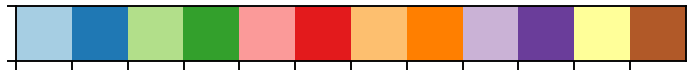

In [4]:
sns.palplot(sns.color_palette("Paired"))

In [5]:
data = pd.read_csv('n38-gs_dimer_trimer-interleave-unpol-repetition_1.00000E+0_21260000121_mcs_counts.mcs', sep='\t', names=['time','counts'])
data['time'] = data['time']*(1e6)
data['counts_per_ramp'] = data['counts']/1000

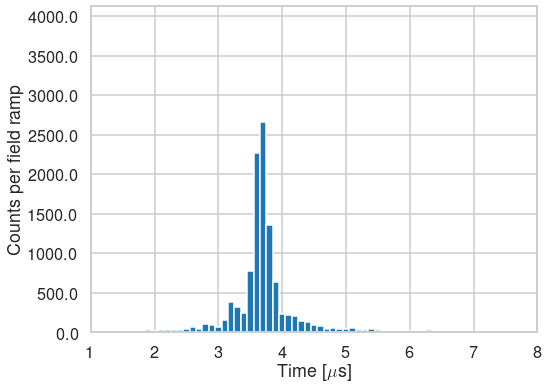

In [6]:
f = plt.figure(figsize=(8,6), clear=False)

with sns.axes_style("whitegrid"):
    plt.bar(data['time'], data['counts'], width=0.1)
    plt.xlabel(r'Time [$\mu$s]')
    plt.ylabel(r'Counts per field ramp')
    
    ax = f.gca()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax.set_xlim([1,8])
    #ax.set_ylim([0,3])

#plt.savefig('mcs_signal.png', transparent=False)

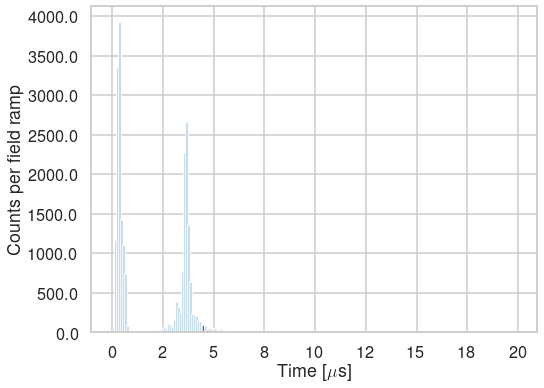

In [7]:
f = plt.figure(figsize=(8,6), clear=False)

with sns.axes_style("whitegrid"):
    plt.bar(data['time'], data['counts'], width=0.1)
    plt.xlabel(r'Time [$\mu$s]')
    plt.ylabel(r'Counts per field ramp')
    
    ax = f.gca()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    #ax.set_xlim([1,8])
    #ax.set_ylim([0,3])

#plt.savefig('mcs_signal_full.png', transparent=True)

C:\Users\reyalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


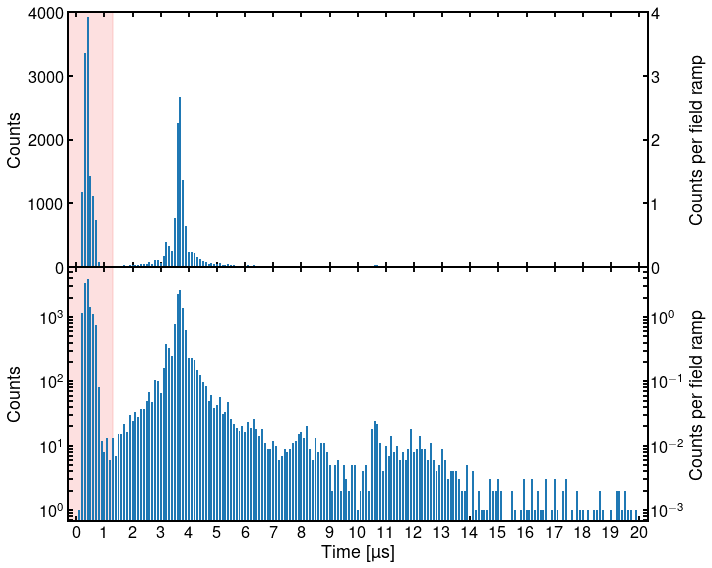

In [11]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10,8), clear=False, sharex=True)

axs[0].bar(data['time'], data['counts'], width=0.07,
           color=sns.color_palette("Paired")[1], zorder=2)
axs[0].xaxis.set_ticks(np.arange(0, 20+1, 1))
axs[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0].set_xlim((-0.3, 20.3))
axs[0].set_ylim((-1, 4000))

ax2 = axs[0].twinx()
mn0, mx0 = axs[0].get_ylim()
ax2.set_ylim(mn0/1000, mx0/1000)

axs[1].bar(data['time'], data['counts'], width=0.07,
           color=sns.color_palette("Paired")[1], zorder=2)
axs[1].xaxis.set_ticks(np.arange(0, 20+1, 1))
axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1].set_yscale('log')
axs[1].set_xlim([-0.3, 20.3])
axs[1].set_ylim((-1, 6000))

ax3 = axs[1].twinx()
mn1, mx1 = axs[1].get_ylim()
ax3.set_ylim(mn1/1000, mx1/1000)
ax3.set_yscale('log')

# MCS excluded bins
axs[0].fill_betweenx(np.linspace(mn0, mx0, 2, endpoint=True), x1=-0.3, x2=13*100/1000,
                     color=sns.color_palette("Paired")[4], alpha=0.3, zorder=0)
axs[1].fill_betweenx(np.linspace(mn1, mx1, 2, endpoint=True), x1=-0.3, x2=13*100/1000,
                     color=sns.color_palette("Paired")[4], alpha=0.3, zorder=0)
                
#ax.set_ylim([0,3])

for ax in axs:
    ax.tick_params(direction='in', axis='both', which='both', bottom=True, top=True, left=True, right=True, length=5)
ax2.tick_params(direction='in', axis='both', which='both', bottom=True, top=True, left=True, right=True, length=5)
ax3.tick_params(direction='in', axis='both', which='both', bottom=True, top=True, left=True, right=True, length=5)

axs[1].set_xlabel(r'Time [\si{\us}]')
axs[0].set_ylabel(r'Counts')
axs[1].set_ylabel(r'Counts')
ax2.set_ylabel('Counts per field ramp')
ax3.set_ylabel('Counts per field ramp')

fig.align_ylabels((axs[0], axs[1]))
fig.align_ylabels((ax2, ax3))

plt.tight_layout()
plt.subplots_adjust(hspace = 0)

plt.savefig('example_mcs_signal.pdf', bbox_inches='tight', transparent=False)

plt.show()